# Wikipedia Text Segmentation

This notebook analyzes the words of a chinese wikipedia article

The most viewed chineze wikipedia articles of 2019 are described here:

https://pageviews.toolforge.org/topviews/?project=zh.wikipedia.org&platform=all-access&date=last-year&excludes=

The article "六四事件" (1989 Tiananmen Square protests/ Tiananmen Square massacre) is the most viewed article of 2019 with 4.196.884 hits.

In [1]:
from bigchina.analyzer import segment_wikipedia_article

In [2]:
tiananmen = segment_wikipedia_article(title="六四事件", language="zh")
tiananmen

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,六四,numeral,False,0,0
1,事件,noun,False,0,1
2,，,punctuation mark,True,1,0
3,又,conjunction,False,1,1
4,稱,noun,False,1,2
...,...,...,...,...,...
27950,War],noun,False,11588,2
27951,Template,noun,False,11588,3
27952,:,punctuation mark,True,11589,0
27953,Authority,noun,False,11589,1


In [3]:
# most viewed article in 2018, tv series: Story of Yanxi Palace
yanxi = segment_wikipedia_article(title="延禧攻略")
yanxi

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,《,punctuation mark,True,0,0
1,延禧,noun,False,0,1
2,攻,verb,False,0,2
3,略,adverb,False,0,3
4,》,punctuation mark,True,2,0
...,...,...,...,...,...
2945,節,punctuation mark,True,1026,0
2946,目的,noun,False,1026,1
2947,變,punctuation mark,True,1027,0
2948,遷,punctuation mark,True,1028,0


In [4]:
yanxi[yanxi.segment == ""]

,segment,characteristic,is_punctuation,sentence,sentence_word_id


In [5]:
tiananmen.characteristic.value_counts()

punctuation mark        11589
noun                     4708
verb                     4186
particle                 1138
adverb                   1005
preposition               968
numeral                   736
adjective                 620
conjunction               585
noun of locality          552
time word                 538
pronoun                   412
classifier                403
distinguishing word       235
locative word              56
multiword expression       25
suffix                     15
modal particle             14
onomatopoeia                1
Name: characteristic, dtype: int64

Most characters are punctuation marks. Since they are not interesting for now they can be filtered out:

In [6]:
tiananmen[tiananmen.characteristic == "punctuation mark"].segment.unique()

array(['，', '、', '。', '（', '）', '“', '”', '時', '會', '簡', '稱', '「', '」',
       '運', '動', '據', '過', '發', '門', '廣', '場', '習', '慣', '國', '軍', '進',
       '駐', '議', '眾', '離', '隊', '執', '務', '陸', '區', '將', '鎮', '壓', '殺',
       '產', '黨', '華', '數', '個', '並', '漸', '對', '響', '剛', '際', '為', '亂',
       '結', '風', '當', '衝', '續', '這', '類', '語', '經', '：', '聞', '體', '詞',
       '關', '報', '導', '則', '減', '絕', '讓', '許', '現', '內', '尋', '開', '論',
       '壇', '繞', '網', '審', '羅', '馬', '寫', '隨', '傳', '視', '彙', '屆', '復',
       '鄧', '總', '參', '謀', '長', '職', '獲', '權', '員', '擔', '書', '記', '處',
       '鋒', '趙', '陽', '領', '層', '儘', '濟', '歡', '敗', '帶', '係', '憂', '斷',
       '來', '價', '機', '穩', '較', '製', '誘', '採', '雙', '軌', '購', '販', '貨',
       '幣', '應', '廠', '無', '潤', '；', '貸', '兌', '礎', '鬆', '間', '買', '積',
       '週', '銷', '闖', '顯', '臨', '膨', '脹', '問', '題', '費', '業', '擁', '與',
       '鐵', '飯', '設', '識', '揮', '實', '學', '額', '況', '計', '劃', '農', '輕',
       '資', '專', '須', '條', '績', '質', '該', '慘', '們', '認', '憑', '決

In [7]:
len(tiananmen.segment.unique())

3364

In [8]:
tiananmen.tail(20)

,segment,characteristic,is_punctuation,sentence,sentence_word_id
27930,参考,verb,False,11585,2
27931,文献,noun,False,11585,3
27933,==,numeral,False,11585,4
27934,==,numeral,False,11585,5
27936,相关,verb,False,11585,6
27937,阅读,verb,False,11585,7
27939,==,numeral,False,11585,8
27940,==,numeral,False,11585,9
27942,外部,noun of locality,False,11585,10
27943,連,punctuation mark,True,11586,0


In [9]:
tiananmen[tiananmen.characteristic != "punctuation mark"]

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,六四,numeral,False,0,0
1,事件,noun,False,0,1
3,又,conjunction,False,1,1
4,稱,noun,False,1,2
5,六四,numeral,False,1,3
...,...,...,...,...,...
27949,[Cold,None,False,11588,1
27950,War],noun,False,11588,2
27951,Template,noun,False,11588,3
27953,Authority,noun,False,11589,1


In [10]:
tiananmen[tiananmen.characteristic.isnull()]

,segment,characteristic,is_punctuation,sentence,sentence_word_id
2675,。,None,False,997,10
2760,。,None,False,1009,11
2928,。,None,False,1051,9
2966,。,None,False,1064,7
3074,。,None,False,1077,6
3130,。,None,False,1085,5
27949,[Cold,None,False,11588,1


<AxesSubplot:xlabel='characteristic'>

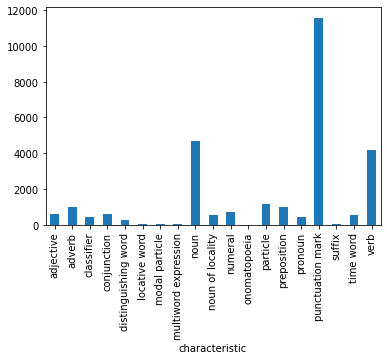

In [11]:
tiananmen.groupby("characteristic")["segment"].count().plot.bar()

<AxesSubplot:xlabel='characteristic'>

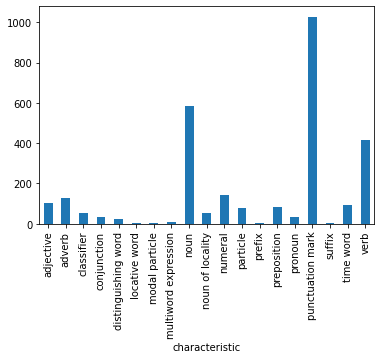

In [12]:
yanxi.groupby("characteristic")["segment"].count().plot.bar()

The distrubution of both articles looks very similar. Does this also apply to the most common words?

In [13]:
tiananmen = tiananmen[tiananmen.characteristic != "punctuation mark"]

tiananmen.segment.value_counts().head(15)

的     947
在     385
中     328
生     253
後     190
有     161
而     154
和     154
大     137
人     136
事件    128
也     118
行     118
且     116
了     115
Name: segment, dtype: int64

In [14]:
yanxi = yanxi[yanxi.characteristic != "punctuation mark"]

yanxi.segment.value_counts().head(20)

的        68
延禧       38
略        33
攻        33
在        32
==       28
===      22
是        19
一        17
中        16
拍        15
集        13
收        13
上        12
於        12
等        11
作        11
播放       10
部         9
2018年     9
Name: segment, dtype: int64

In both articles the word "的" is the most frequently used one.
The word "在" is similarly often used. The other words have a pretty similar distrubution.

To get a better result, alot of wikipedia articles should be accumulated and then analyzed together.

## Uniqueness over time

to get the number of unique words over time the following transformation has to be performed:



In [15]:
from bigchina.analyzer import rolling_unique_count

yanxi.reset_index(drop=True, inplace=True)
yanxi = rolling_unique_count(yanxi, "segment")

In [16]:
yanxi

,segment,characteristic,is_punctuation,sentence,sentence_word_id,rolling_unique_segment_count
0,延禧,noun,False,0,1,1
1,攻,verb,False,0,2,2
2,略,adverb,False,0,3,3
3,英,distinguishing word,False,3,1,4
4,Story,noun,False,5,1,5
...,...,...,...,...,...,...
1846,简体,distinguishing word,False,1022,1,790
1847,中文,noun,False,1022,2,791
1848,==,numeral,False,1023,1,791
1849,目的,noun,False,1026,1,792


In [18]:
yanxi[yanxi.segment == "巧妙"]

,segment,characteristic,is_punctuation,sentence,sentence_word_id,rolling_unique_segment_count
1097,巧妙,adjective,False,707,2,534


<AxesSubplot:xlabel='index'>

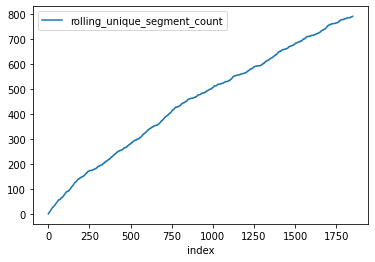

In [19]:
yanxi.reset_index().plot(x='index', y='rolling_unique_segment_count')

<AxesSubplot:xlabel='index'>

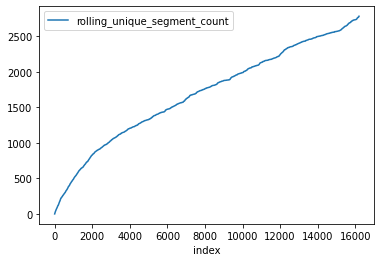

In [31]:
tiananmen.reset_index(drop=True, inplace=True)
tiananmen = rolling_unique_count(tiananmen, "segment")
tiananmen.reset_index().plot(x='index', y='rolling_unique_segment_count')


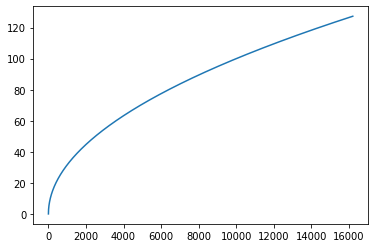

In [32]:
import numpy
import matplotlib.pyplot as plt
square_roots =  numpy.sqrt(tiananmen.index)

plt.plot(tiananmen.index, square_roots)

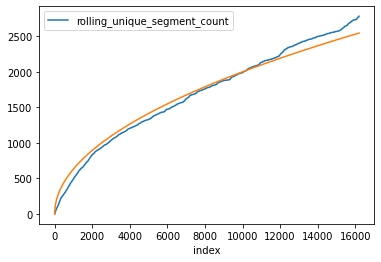

In [35]:
tiananmen.reset_index().plot(x='index', y='rolling_unique_segment_count')
plt.plot(tiananmen.index, square_roots*20)

As it seems the number of unique words over time can be approximated by a square root function!

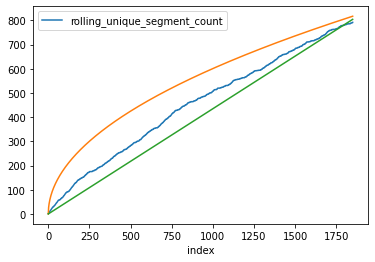

In [50]:
yanxi.reset_index().plot(x='index', y='rolling_unique_segment_count')
plt.plot(yanxi.index, numpy.sqrt(yanxi.index)*19)
plt.plot(yanxi.index, yanxi.index/2.3)

Here, the curve is more linear than anything else.